In [1]:
# importamos las librerías necesarias para trabajar.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Otros 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_caba = pd.read_feather('./data/CovidCabaFeather')
df_caba.head()

,index,id_evento_caso,sexo,edad,edad_años_meses,residencia_pais_nombre,residencia_provincia_nombre,residencia_departamento_nombre,carga_provincia_nombre,fecha_inicio_sintomas,...,fallecido,fecha_fallecimiento,asistencia_respiratoria_mecanica,carga_provincia_id,origen_financiamiento,clasificacion,clasificacion_resumen,residencia_provincia_id,fecha_diagnostico,residencia_departamento_id
0,0,1000000,M,53.0,Años,Argentina,CABA,SIN ESPECIFICAR,Buenos Aires,NaT,...,NO,NaT,NO,6,Privado,Caso Descartado,Descartado,2,2020-06-09,0
1,6,1000008,F,69.0,Años,Argentina,CABA,SIN ESPECIFICAR,CABA,2020-05-31,...,NO,NaT,NO,2,Privado,Caso Descartado,Descartado,2,2020-06-01,0
2,8,1000010,M,7.0,Años,Argentina,CABA,COMUNA 07,CABA,NaT,...,NO,NaT,NO,2,Público,Caso confirmado por laboratorio - No activo (p...,Confirmado,2,2020-06-01,7
3,10,1000012,M,46.0,Años,Argentina,CABA,SIN ESPECIFICAR,CABA,2020-05-26,...,NO,NaT,NO,2,Privado,Caso confirmado por laboratorio - No Activo po...,Confirmado,2,2020-05-31,0
4,13,1000015,F,29.0,Años,Argentina,CABA,COMUNA 07,Buenos Aires,2020-05-18,...,NO,NaT,NO,6,Privado,Caso confirmado por laboratorio - No activo (p...,Confirmado,2,2020-06-01,7


In [4]:
pd.unique(df_caba.residencia_departamento_nombre .values)

array(['SIN ESPECIFICAR', 'COMUNA 07', 'COMUNA 03', 'COMUNA 04',
       'COMUNA 02', 'COMUNA 12', 'COMUNA 06', 'COMUNA 13', 'COMUNA 08',
       'COMUNA 05', 'COMUNA 15', 'COMUNA 10', 'COMUNA 14', 'COMUNA 01',
       'COMUNA 09', 'COMUNA 11'], dtype=object)

## Unificamos la escala de edades

Dividimos las edades en meses por 12 asi medimos todo en años

In [5]:
df_caba.loc[df_caba.edad_años_meses == 'Meses', 'edad'] = df_caba.edad / 12
df_caba.loc[df_caba.edad_años_meses == 'Meses',:]

,index,id_evento_caso,sexo,edad,edad_años_meses,residencia_pais_nombre,residencia_provincia_nombre,residencia_departamento_nombre,carga_provincia_nombre,fecha_inicio_sintomas,...,fallecido,fecha_fallecimiento,asistencia_respiratoria_mecanica,carga_provincia_id,origen_financiamiento,clasificacion,clasificacion_resumen,residencia_provincia_id,fecha_diagnostico,residencia_departamento_id
161,737,1000994,F,0.333333,Meses,Argentina,CABA,SIN ESPECIFICAR,CABA,2020-06-01,...,NO,NaT,NO,2,Público,Caso Descartado,Descartado,2,2020-06-01,0
325,1366,1001796,F,0.500000,Meses,Argentina,CABA,COMUNA 07,CABA,NaT,...,NO,NaT,NO,2,Público,Caso Descartado,Descartado,2,NaT,7
343,1409,1001862,NR,0.500000,Meses,Argentina,CABA,SIN ESPECIFICAR,CABA,NaT,...,NO,NaT,NO,2,Público,Caso Descartado,Descartado,2,2020-06-01,0
457,1707,1002272,F,0.500000,Meses,Argentina,CABA,SIN ESPECIFICAR,CABA,2020-05-31,...,NO,NaT,NO,2,Público,Caso confirmado por laboratorio - No activo (p...,Confirmado,2,2020-06-01,0
511,1853,1002474,M,0.833333,Meses,Argentina,CABA,COMUNA 07,CABA,NaT,...,NO,NaT,NO,2,Público,Caso confirmado por laboratorio - Activo Inter...,Confirmado,2,2020-06-01,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360486,2359087,996913,NR,0.916667,Meses,Argentina,CABA,SIN ESPECIFICAR,CABA,NaT,...,NO,NaT,NO,2,Público,Caso Descartado,Descartado,2,2020-05-31,0
360660,2359558,997460,F,0.750000,Meses,Argentina,CABA,SIN ESPECIFICAR,CABA,2020-05-28,...,NO,NaT,NO,2,Público,Caso Descartado,Descartado,2,2020-05-28,0
360861,2360168,998140,F,0.583333,Meses,Argentina,CABA,COMUNA 01,CABA,NaT,...,NO,NaT,NO,2,Público,Caso confirmado por laboratorio - No activo (p...,Confirmado,2,2020-06-01,1
360954,2360461,998524,F,0.833333,Meses,Argentina,CABA,SIN ESPECIFICAR,CABA,NaT,...,NO,NaT,NO,2,Privado,Caso Descartado,Descartado,2,2020-05-29,0


Con las edades unificadas removemos la columna 'edad_años_meses' y aprovechamos para sacar tambien las columnas 'residencia_provincia_nombre', 'residencia_pais_nombre', 'sepi (semana epidemiologica) apertura', 'carga_provincia_id', 'residencia_provincia_id','residencia_departamento_id' ya solo vamos a usar los datos de CABA.

In [6]:
df_caba = df_caba.drop(['index', 'edad_años_meses', 'residencia_provincia_nombre','residencia_pais_nombre','sepi_apertura',
                       'carga_provincia_id','residencia_provincia_id','residencia_departamento_id'], axis=1)

In [7]:
df_caba.tail()

,id_evento_caso,sexo,edad,residencia_departamento_nombre,carga_provincia_nombre,fecha_inicio_sintomas,fecha_apertura,fecha_internacion,cuidado_intensivo,fecha_cui_intensivo,fallecido,fecha_fallecimiento,asistencia_respiratoria_mecanica,origen_financiamiento,clasificacion,clasificacion_resumen,fecha_diagnostico
361128,999976,F,27.0,SIN ESPECIFICAR,CABA,2020-05-15,2020-06-01,NaT,NO,NaT,NO,NaT,NO,Público,Caso Descartado,Descartado,2020-06-01
361129,999982,M,38.0,SIN ESPECIFICAR,Tucumán,NaT,2020-06-01,NaT,NO,NaT,NO,NaT,NO,Público,Caso Descartado,Descartado,2020-06-02
361130,999990,F,50.0,SIN ESPECIFICAR,CABA,2020-05-28,2020-06-01,2020-05-31,NO,NaT,NO,NaT,NO,Privado,Caso confirmado por laboratorio - No Activo po...,Confirmado,2020-06-01
361131,999996,M,42.0,SIN ESPECIFICAR,CABA,NaT,2020-06-01,NaT,NO,NaT,NO,NaT,NO,Privado,Caso Descartado,Descartado,2020-06-01
361132,999997,F,30.0,SIN ESPECIFICAR,Córdoba,NaT,2020-06-01,NaT,NO,NaT,NO,NaT,NO,Público,Caso Descartado,Descartado,2020-06-02


## Modificamos las columnas con strings 'SI'/'NO' por variables booleanas.

In [8]:
df_caba.loc[df_caba.fallecido == 'NO', 'fallecido'] = False
df_caba.loc[df_caba.fallecido == 'SI', 'fallecido'] = True

df_caba.loc[df_caba.asistencia_respiratoria_mecanica == 'NO', 'asistencia_respiratoria_mecanica'] = False
df_caba.loc[df_caba.asistencia_respiratoria_mecanica == 'SI', 'asistencia_respiratoria_mecanica'] = True

Hacemos lo mismo para la columna 'sexo'

In [9]:
df_caba.loc[df_caba.sexo == 'M', 'sexo'] = 0
df_caba.loc[df_caba.sexo == 'F', 'sexo'] = 1

## Evaluamos datos faltantes por columnas

In [11]:
df_caba.isnull().sum()

id_evento_caso                           0
sexo                                     0
edad                                   256
residencia_departamento_nombre           0
carga_provincia_nombre                   0
fecha_inicio_sintomas               189734
fecha_apertura                           0
fecha_internacion                   317362
cuidado_intensivo                        0
fecha_cui_intensivo                 356249
fallecido                                0
fecha_fallecimiento                 355767
asistencia_respiratoria_mecanica         0
origen_financiamiento                    0
clasificacion                            0
clasificacion_resumen                    0
fecha_diagnostico                    34788
dtype: int64

## Ordenamos los datos de acuerdo a la fecha de apertura

In [12]:
df_caba['fecha_apertura'] =pd.to_datetime(df_caba.fecha_apertura)
df_caba = df_caba.sort_values(by='fecha_apertura')

### Creamos un df unicamente con casos CONFIRMADOS de CABA

In [13]:
df_confirmados = pd.DataFrame(df_caba.loc[df_caba.clasificacion_resumen == 'Confirmado'])
df_confirmados.head() #notar que el primer caso confirmado fue el 02-03-2020

,id_evento_caso,sexo,edad,residencia_departamento_nombre,carga_provincia_nombre,fecha_inicio_sintomas,fecha_apertura,fecha_internacion,cuidado_intensivo,fecha_cui_intensivo,fallecido,fecha_fallecimiento,asistencia_respiratoria_mecanica,origen_financiamiento,clasificacion,clasificacion_resumen,fecha_diagnostico
326189,734634,0,43.0,COMUNA 01,CABA,2020-02-28,2020-03-02,2020-03-01,NO,NaT,False,NaT,False,Privado,Caso confirmado por laboratorio - No Activo po...,Confirmado,2020-03-03
326216,739292,0,24.0,COMUNA 13,CABA,2020-03-01,2020-03-05,2020-03-03,NO,NaT,False,NaT,False,Privado,Caso confirmado por laboratorio - No Activo po...,Confirmado,2020-03-11
326213,738965,0,47.0,COMUNA 03,CABA,2020-03-03,2020-03-05,2020-03-03,NO,NaT,False,NaT,False,Privado,Caso confirmado por laboratorio - No activo (p...,Confirmado,2020-03-06
326212,738908,1,72.0,COMUNA 07,CABA,2020-03-04,2020-03-05,NaT,NO,NaT,False,NaT,False,Público,Caso confirmado por laboratorio - No Activo po...,Confirmado,2020-03-06
326203,737975,0,45.0,COMUNA 05,CABA,2020-03-04,2020-03-05,NaT,NO,NaT,False,NaT,False,Privado,Caso confirmado por laboratorio - No activo (p...,Confirmado,2020-03-06


### Creamos un df con casos confirmados acumulados diarios

In [14]:
ones = pd.DataFrame(np.ones(df_confirmados.fecha_apertura.count(), dtype=int)) #creo un array con "1"
df_fecha_apertura = pd.DataFrame(df_confirmados.fecha_apertura)
df_fecha_apertura = df_fecha_apertura.reset_index(drop=True)
df_fecha_apertura= pd.DataFrame(df_fecha_apertura.combine_first(ones))
df_fecha_apertura.columns =['fecha_apertura', 'conteo']
df_fecha_apertura

,fecha_apertura,conteo
0,2020-03-02,1.0
1,2020-03-05,1.0
2,2020-03-05,1.0
3,2020-03-05,1.0
4,2020-03-05,1.0
...,...,...
127049,2020-09-30,1.0
127050,2020-09-30,1.0
127051,2020-09-30,1.0
127052,2020-09-30,1.0


In [15]:
#cuento casos diarios
df_confirmados_xdias = pd.Series(df_fecha_apertura['conteo'].groupby(df_fecha_apertura['fecha_apertura'].dt.to_period('D')).sum())
df_confirmados_xdias.index = df_confirmados_xdias.index.to_timestamp() #el .to_timestamp lo pide despues el .reindex
type(df_confirmados_xdias.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [16]:
#creo un vector con fechas completas desde 01-03-20 hasta 29-09-20
df_fechas = pd.date_range('03-01-2020', '09-30-2020')
df_fechas

DatetimeIndex(['2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04',
               '2020-03-05', '2020-03-06', '2020-03-07', '2020-03-08',
               '2020-03-09', '2020-03-10',
               ...
               '2020-09-21', '2020-09-22', '2020-09-23', '2020-09-24',
               '2020-09-25', '2020-09-26', '2020-09-27', '2020-09-28',
               '2020-09-29', '2020-09-30'],
              dtype='datetime64[ns]', length=214, freq='D')

In [17]:
#relleno las fechas faltantes del dataset con 0 casos confirmados

df_confirmados_xdias.index = pd.DatetimeIndex(df_confirmados_xdias.index)

df_confirmados_xdias = df_confirmados_xdias.reindex(df_fechas, fill_value=0)
df_confirmados_xdias.columns = ['fecha_apertura','casos_positivos']
df_confirmados_xdias

2020-03-01      0.0
2020-03-02      1.0
2020-03-03      0.0
2020-03-04      0.0
2020-03-05      5.0
              ...  
2020-09-26    696.0
2020-09-27    569.0
2020-09-28    787.0
2020-09-29    908.0
2020-09-30    856.0
Freq: D, Name: conteo, Length: 214, dtype: float64

## Graficamos
### Casos confirmados (positivos) vs. tiempo

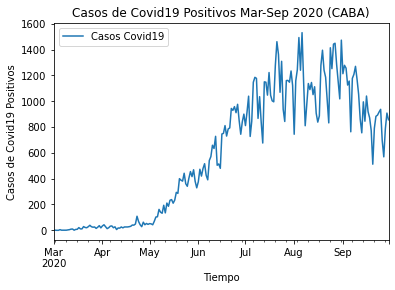

In [18]:
df_confirmados_xdias.plot(x='fecha_apertura', y='casos_positivos', label="Casos Covid19")

plt.xlabel('Tiempo')
plt.ylabel('Casos de Covid19 Positivos')
plt.title('Casos de Covid19 Positivos Mar-Sep 2020 (CABA)')
plt.legend()
plt.show()